---
title: Interactive LISA Segmentation through optimized model prompts  
author: Yifei Duan, Yifan Duan  
date: 2024/10/02  
---

Dropdown(description='Switch:', options=(('Rough Prompt', 0), ('Simple Prompt', 1), ('Detailed Prompt', 2)), v…

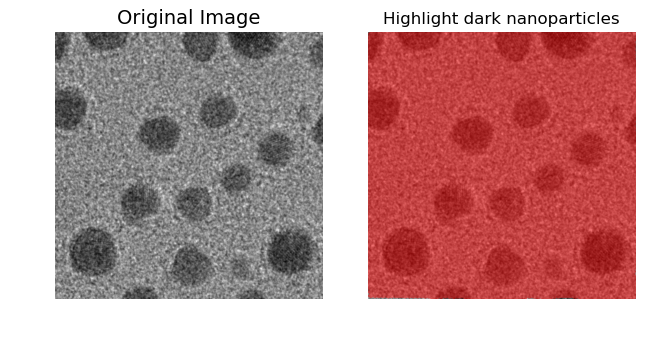

In [1]:
#| label: app:fig7

%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
import numpy as np

# Image labels file paths
image_paths = [
    "LISA/TEMimage.png",
    "LISA/01.png",
    "LISA/02.png",
    "LISA/03.png",
]

# LISA prompt
image_labels = [
    "Original Image",
    "Highlight dark nanoparticles",
    "Highlight all dark, round nanoparticles in the microscopy image.",
    "Highlight every dark, circular nanoparticle present in the entire microscopy \nimage.Ensure no nanoparticles are missed and all are accurately marked.",
]

# prompt labels
prompt_labels = [
    "Rough Prompt",
    "Simple Prompt",
    "Detailed Prompt",
]

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.7, 3.5), gridspec_kw={'width_ratios': [1, 1]}, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.01, hspace=0)  # Adjust spacing

# reduce whitespace
fig.tight_layout(pad=1.7)

fig.canvas.resizable = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.toolbar_visible = True
fig.canvas.layout.width = '670px'
fig.canvas.layout.height = "360px"
fig.canvas.toolbar_position = 'bottom'

# Original image on the left side
original_image = mpimg.imread(image_paths[0])
ax1.imshow(original_image)  # Display in color
ax1.axis('off')
ax1.set_title(image_labels[0], fontsize=14)

# Display the first image on the right side
initial_image = mpimg.imread(image_paths[1])
right_img_display = ax2.imshow(initial_image)  # Display in color
ax2.axis('off')  # 关闭坐标轴
right_title = ax2.set_title(image_labels[1], fontsize=12)

# Update function
def update_image(change):
    img = mpimg.imread(image_paths[change['new'] + 1])  # 因为左边是固定的原始图像，右边从索引1开始
    right_img_display.set_data(img)  # Update image (right)
    right_img_display.set_cmap(None) # with color image
    
    # small fontsize for third option
    if change['new'] + 1 == 3:
        right_title.set_text(image_labels[change['new'] + 1])
        right_title.set_fontsize(6)
    else:
        right_title.set_text(image_labels[change['new'] + 1])
        right_title.set_fontsize(8)
    fig.canvas.draw_idle()  # Redraw the canvas

# dropdown widget (for prompt labels)
dropdown = widgets.Dropdown(
    options=[(prompt_labels[i], i) for i in range(0, len(prompt_labels))],
    value=0,
    description='Switch:'
)

# Add an observer to the dropdown menu
dropdown.observe(update_image, names='value')

# Display
display(dropdown)
plt.show()